# Gold Ore Project

Introduction: this project contains the gold ore extraction and purfication stages and creating a model that helps optimize producttion and eliminate parameters that are not needed.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import KFold
import warnings
pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')

In [2]:
#Prepare the data
try:
    gold_train = pd.read_csv("/datasets/gold_recovery_train.csv")
except FileNotFoundError:
    gold_train = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv')


In [3]:
try:
    gold_test = pd.read_csv("/datasets/gold_recovery_test.csv")
except FileNotFoundError:
    gold_test = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv')


In [4]:
try:
    gold_full = pd.read_csv("/datasets/gold_recovery_full.csv")
except FileNotFoundError:
    gold_full = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv')


In [3]:
gold_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [4]:
gold_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [5]:
gold_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [6]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [7]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [8]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [9]:
#Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. 
#checking for missing value
gold_train[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']].isnull().sum()

rougher.output.concentrate_au      82
rougher.input.feed_au              83
rougher.output.tail_au           2249
dtype: int64

In [10]:
gold_train['numerator'] = gold_train['rougher.output.concentrate_au'] * (gold_train['rougher.input.feed_au'] - gold_train['rougher.output.tail_au'])
gold_train['denominator'] = gold_train['rougher.input.feed_au'] * (gold_train['rougher.output.concentrate_au'] - gold_train['rougher.output.tail_au'])

In [11]:
gold_train[['numerator', 'denominator']].isnull().sum()

numerator      2250
denominator    2250
dtype: int64

In [12]:
gold_train['numerator'] = gold_train['numerator'].fillna(0)
gold_train['denominator'] = gold_train['denominator'].fillna(1)

In [13]:
#Find the MAE between your calculations and the feature values. Provide findings.
gold_train['formula'] = gold_train['numerator'] / gold_train['denominator'] * 100

In [14]:
results = (gold_train['formula'] - gold_train['rougher.output.recovery']).abs().mean()

print('The difference between the calculation results and the original results is {}'.format(results))

The difference between the calculation results and the original results is 9.303415616264301e-15


The mean absolute error of 9.303415616264301e-15 measures accruracy for continous variables and is calculated to find difference between underfitting and overfitting. The result of the score indicates that there is a very low chance of recovery.

In [15]:
#Analyze the features not available in the test set. What are these parameters? What is their type?
missed_columns = set(list(gold_train.columns.values))-set(list(gold_test.columns.values))

In [16]:
missed_columns

{'denominator',
 'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'formula',
 'numerator',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'ro

In [17]:
gold_full.dtypes

date                                           object
final.output.concentrate_ag                   float64
final.output.concentrate_pb                   float64
final.output.concentrate_sol                  float64
final.output.concentrate_au                   float64
                                               ...   
secondary_cleaner.state.floatbank5_a_level    float64
secondary_cleaner.state.floatbank5_b_air      float64
secondary_cleaner.state.floatbank5_b_level    float64
secondary_cleaner.state.floatbank6_a_air      float64
secondary_cleaner.state.floatbank6_a_level    float64
Length: 87, dtype: object

All of the columns type is float. Target feature is also missing. We cannot use them during training.

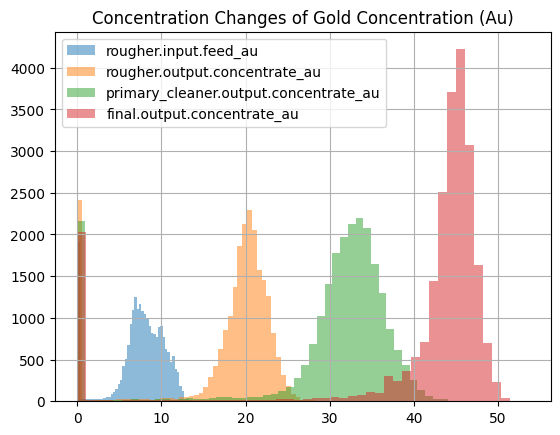

In [18]:
#Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.
stages = [
    'rougher.input.feed_{}',
    'rougher.output.concentrate_{}',
    'primary_cleaner.output.concentrate_{}',
    'final.output.concentrate_{}',
]

def progress(logam):
    step = [s.format(logam) for s in stages]
    for i in step:
        gold_full[i].hist(alpha=0.5, bins=50)
    plt.legend(step)
    
progress('au')
plt.title('Concentration Changes of Gold Concentration (Au)');

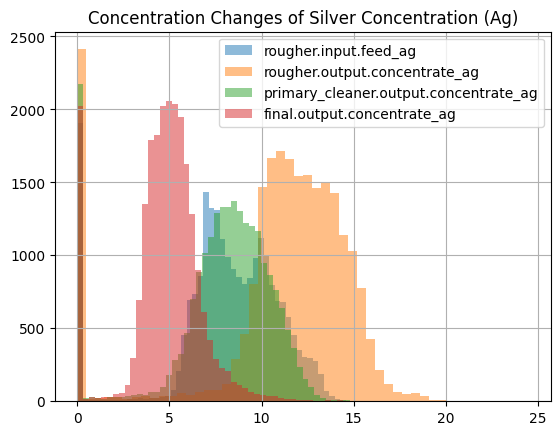

In [19]:
progress('ag')
plt.title('Concentration Changes of Silver Concentration (Ag)');

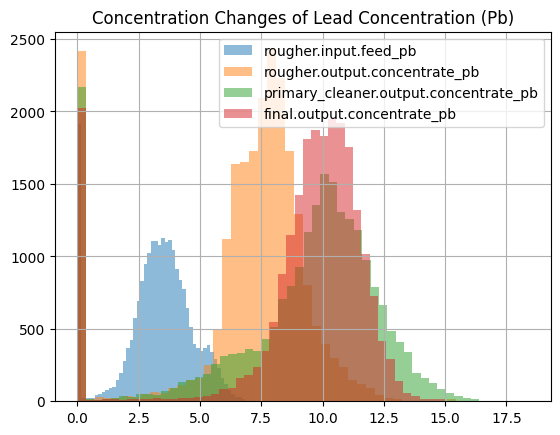

In [20]:
progress('pb')
plt.title('Concentration Changes of Lead Concentration (Pb)');

In the Au graph, as the purification stage increases so does the concentration.

In the Ag graph, it is highest at its floatation stage but decreases at each purification stage.

In the Pb graph, the concentration increases and the primary cleaner and final output are level.

In [21]:
#Merging rougher.output.recovery and final.output.recovery targets from full set into test set
gold_full_test = gold_test.merge(gold_full[['date', 'rougher.output.recovery', 'final.output.recovery']], how="left", on="date")

gold_train_test = gold_train[gold_full_test.columns]

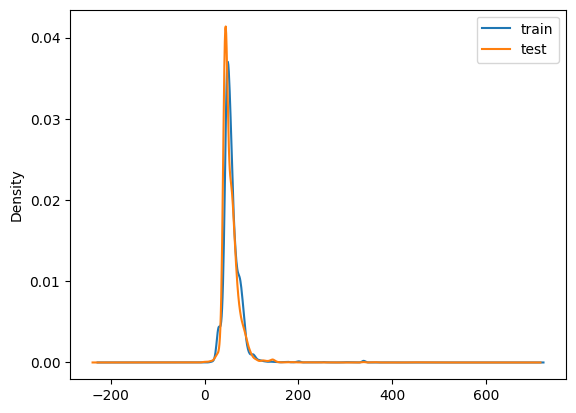

In [22]:
#Compare the feed particle size distributions in the training set and in the test set. 
#If the distributions vary significantly, the model evaluation will be incorrect.
gold_train['rougher.input.feed_size'].plot.kde();
gold_test['rougher.input.feed_size'].plot.kde();
plt.legend(['train', 'test'])

The distribution is balanced between the training and test set, as they are even.

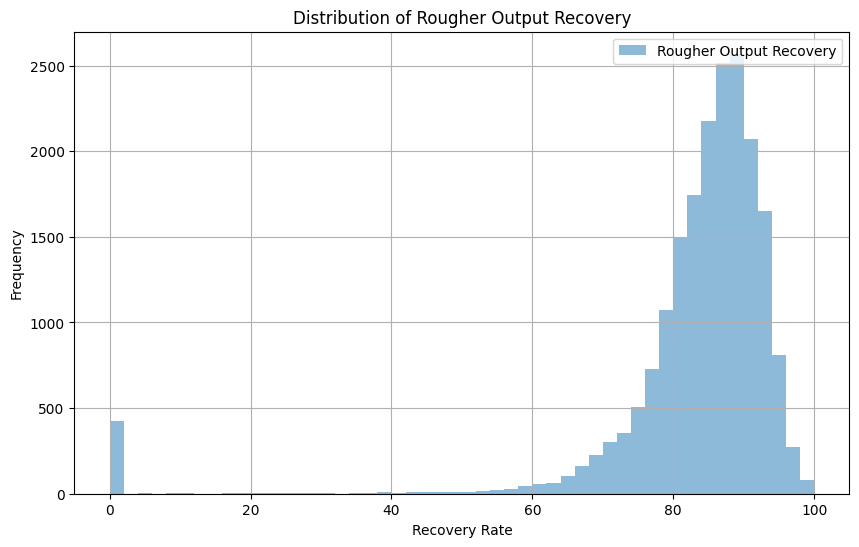

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(gold_full['rougher.output.recovery'], bins=50, alpha=0.5, label='Rougher Output Recovery')
plt.xlabel('Recovery Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Rougher Output Recovery')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

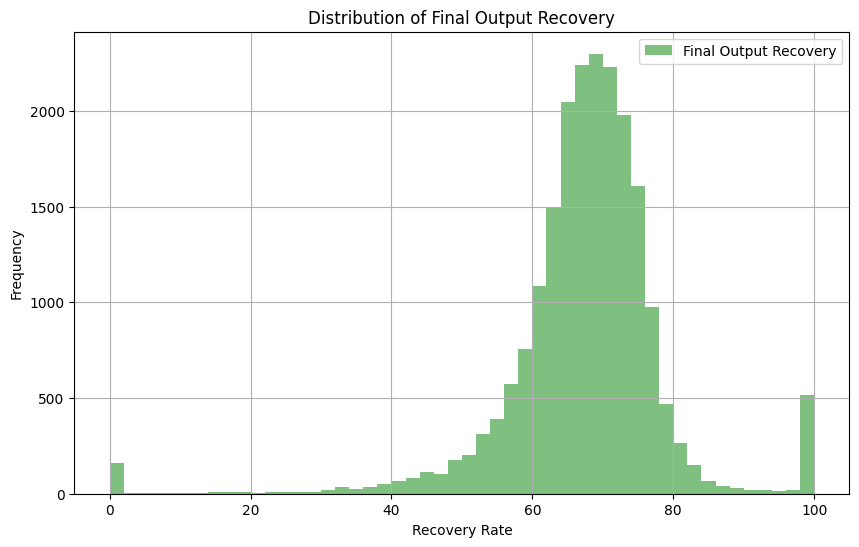

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(gold_full['final.output.recovery'], bins=50, alpha=0.5, label='Final Output Recovery', color='green')
plt.xlabel('Recovery Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Final Output Recovery')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

<AxesSubplot:>

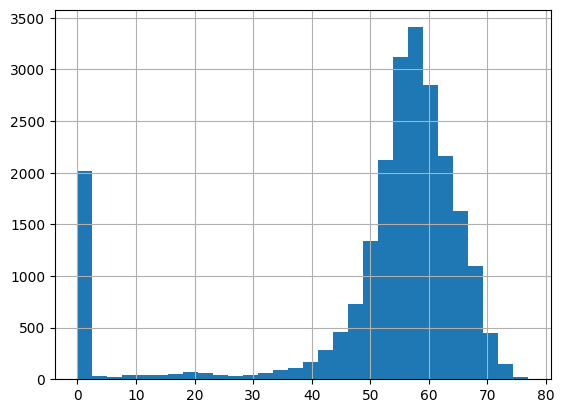

In [25]:
feature_input = [
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol',
]
gold_full[feature_input].sum(1).hist(bins=30)

There is anomaly of 0 and it will be removed further down.

<AxesSubplot:>

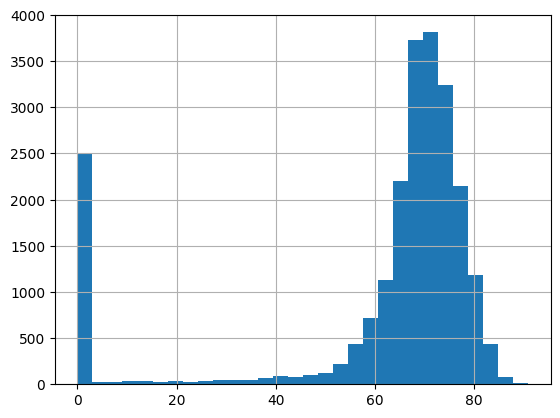

In [26]:
feature_output = [
    'rougher.output.concentrate_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
]
gold_full[feature_output].sum(1).hist(bins=30)

There is anomaly of 0 and it will be removed further down.

In [27]:
gold_train['rougher.input.feed_size'].describe()

count    16443.000000
mean        58.676444
std         23.922591
min          9.659576
25%         47.575879
50%         54.104257
75%         65.051064
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [28]:
gold_full['rougher.input.feed_size'].describe()

count    22277.000000
mean        57.959166
std         23.644823
min          0.046369
25%         46.687088
50%         53.405122
75%         64.096151
max        484.967466
Name: rougher.input.feed_size, dtype: float64

Based on the distribution and mean, the training set and test set are similar.

<AxesSubplot:>

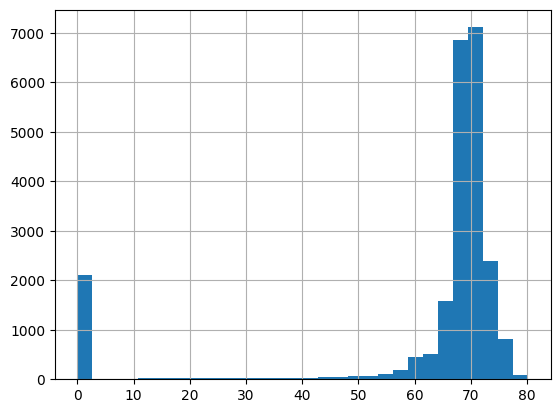

In [29]:
#Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. 
#Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? 
#Describe the findings and eliminate anomalies.
feature_final = [
    'final.output.concentrate_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol',
]
gold_full[feature_final].sum(1).hist(bins=30)

In [30]:
# 0 will be removed here.
i = 0

gold_train = gold_train[gold_train[feature_input].sum(1) > i]
gold_train = gold_train[gold_train[feature_output].sum(1) > i]
gold_train = gold_train[gold_train[feature_final].sum(1) > i]

gold_full_test = gold_full[gold_full['date'].isin(gold_test['date'])].reset_index(drop = True)
gold_test = gold_test[gold_full_test[feature_input].sum(1) > i]
gold_test = gold_test[gold_full_test[feature_output].sum(1) > i]
gold_test = gold_test[gold_full_test[feature_final].sum(1) > i]
print(gold_train.shape)
print(gold_test.shape)

(15096, 90)
(5278, 53)


In [31]:
#fixing missing value
columns_used = gold_test.columns.values.tolist()
columns_used.append('rougher.output.recovery')
columns_used.append('final.output.recovery')
gold_train_fix = gold_train[columns_used]
gold_train_fix = gold_train_fix[gold_train_fix['rougher.output.recovery'].notnull()].reset_index(drop = True)
gold_train_fix = gold_train_fix[gold_train_fix['final.output.recovery'].notnull()].reset_index(drop = True)
print(gold_train_fix.shape)
print(gold_test.shape)

(13795, 55)
(5278, 53)


In [32]:
gold_full_fix = pd.concat([gold_train_fix, gold_test])
gold_full_fix.isnull().mean().sort_values(ascending = False)


final.output.recovery                         0.276726
rougher.output.recovery                       0.276726
rougher.input.floatbank11_xanthate            0.022283
rougher.state.floatbank10_e_air               0.019556
secondary_cleaner.state.floatbank2_a_air      0.011325
rougher.input.feed_size                       0.007340
rougher.input.feed_pb                         0.005243
rougher.input.feed_sol                        0.005191
primary_cleaner.input.xanthate                0.005138
rougher.input.floatbank10_sulfate             0.001887
rougher.input.floatbank11_sulfate             0.001730
primary_cleaner.input.depressant              0.001573
primary_cleaner.input.sulfate                 0.001101
secondary_cleaner.state.floatbank2_b_air      0.001049
rougher.input.feed_rate                       0.000786
secondary_cleaner.state.floatbank3_a_air      0.000629
rougher.input.floatbank10_xanthate            0.000472
secondary_cleaner.state.floatbank4_a_air      0.000210
primary_cl

In [33]:
for i in gold_full_fix.isnull().mean().sort_values(ascending = False)[2:-2].index:
    median_cols = gold_full_fix[i].median()
    gold_full_fix[i] = gold_full_fix[i].fillna(median_cols)
gold_test_final = gold_full_fix[gold_full_fix['rougher.output.recovery'].isnull()]
gold_test_final = gold_test_final.drop(columns = ['rougher.output.recovery', 'final.output.recovery'])

gold_train_final = gold_full_fix[gold_full_fix['rougher.output.recovery'].notnull()].reset_index(drop = True)

In [34]:
#Building the model
feature = gold_test_final.drop(columns = ['date']).columns.values
target = ['rougher.output.recovery', 'final.output.recovery']
feature_train = gold_train_final[feature].reset_index(drop = True)
target_train = gold_train_final[target].reset_index(drop = True)
target_train.columns = [0,1]
feature_test = gold_test_final[feature].reset_index(drop = True)
target_test = gold_full[target].loc[gold_test_final.index].reset_index(drop = True)
target_test.columns = [0,1]

In [35]:
#Write a function to calculate the final sMAPE value.
def smape(y_true, y_pred):
    error = (y_true - y_pred).abs()
    scale = (y_true.abs() + y_pred.abs()) / 2
    
    return (error / scale).mean() * 100

def smape_weighted(y_true, y_pred):
    rougher = smape(y_true[0], y_pred[0])
    final = smape(y_true[1], y_pred[1])
    
    return 0.25 * rougher + 0.75 * final

In [36]:
#Train different models. Evaluate them using cross-validation. 
#Pick the best model and test it using the test sample. Provide findings.
#Baseline Model
pred_median = target_train.copy()
pred_median[0] = target_train[0].median()
pred_median[1] = target_train[1].median()
print(smape_weighted(target_train, pred_median))

pred_median = target_test.copy()
pred_median[0] = target_train[0].median()
pred_median[1] = target_train[1].median()
print(smape_weighted(target_test, pred_median))

9.468182190998984
12.58658219842897


In [37]:
# Create a function to train model with cross-validation to get the best hyperparamater for model
def score_model(model, cv = 4):
    score = []
    
    for subtrain_index, valid_index in KFold(n_splits=cv).split(feature_train):
        
        feature_subtrain = feature_train.loc[subtrain_index].reset_index(drop = True)
        target_subtrain = target_train.loc[subtrain_index].reset_index(drop = True)
        
        feature_valid = feature_train.loc[valid_index].reset_index(drop = True)
        target_valid = target_train.loc[valid_index].reset_index(drop = True)
        
        model.fit(feature_subtrain, target_subtrain)
        pred_valid = pd.DataFrame(model.predict(feature_valid))
        
        score.append(smape_weighted(target_valid, pred_valid))
        
    return pd.Series(score).mean()

In [38]:
#Random Forest Regression
for depth in range(1,5):
    model_rf = RandomForestRegressor(max_depth= depth, n_estimators = 50, random_state=12345)
    score = score_model(model_rf)
    print('RF, depth = ', depth, 'score = ', score)

RF, depth =  1 score =  10.234362942796965
RF, depth =  2 score =  9.803892473144353
RF, depth =  3 score =  9.3635246678597
RF, depth =  4 score =  9.434909125771096


In [39]:
#Linear Regression
model_lr = LinearRegression()
linear_score = score_model(model_lr)
print('LR : ', linear_score)

LR :  10.29831784913301


In [40]:
#Checking the quality of tuned model and testing it with the test set with a hyperparameter.
# Using RandomForest with depth = 3 as the best model
model = RandomForestRegressor(max_depth= 3, n_estimators = 50, random_state=12345)
model.fit(feature_train, target_train)

predict = pd.DataFrame(model.predict(feature_train))
print('train : ', smape_weighted(target_train, predict))

predict = pd.DataFrame(model.predict(feature_test))
print('test : ', smape_weighted(target_test, predict))

train :  7.489940076936724
test :  13.989139883476396


Conclusion:

gold_train had missing values.

The mean absolute error of 9.303415616264301e-15 measures accruracy for continous variables and is calculated to find difference between underfitting and overfitting. The result of the score indicates that there is a very low chance of recovery.

The concentration of gold varies significantly with each refining process.

Silver concentration varies, but not to the extent of the gold refining process.

The final output concentration is slightly lower than the input concentration.

Lead concentration changes, but not to the extent of the gold refining process.

Compare the particle size distribution of the feed in the training set and the test set. The data from both sets is evenly distributed.

There is an anomaly number 0 at every stage of pufification. It was removed.

To handle missing values in all tables, we can fill them in with the median value.

The Random Forest model with a depth of 3 is the most effective model.

The SMAPE for the training data is 7.49%, while the SMAPE for the test data is 13.99%.

The lower SMAPE value for the training data indicates that the model performs better in predicting the target variable for the data it was trained on.